# **Diabetes Prediction**
(Logistic Regression)

# **Problem Statement**
Build a model which predicts chances of having diabetes based on various factors affecting it.

# **Data**
We are using the dataset from the National Institute of Diabetes and Digestive and Kidney Diseases to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset using a Logistic Regression model.

In this notebook, we'll build a Logistic Regression model to predict diabetes using  appropriate predictor variables like their BMI, insulin level, age, and so on.

# **Reading and Understanding the Data**


In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
from numpy import math

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Connect with Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# reading Dataset

col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

diabetes = pd.read_csv("/content/drive/MyDrive/pima-indians-diabetes.data", names= col_names)

# **Data Inspection**

In [7]:
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Data Visualization**

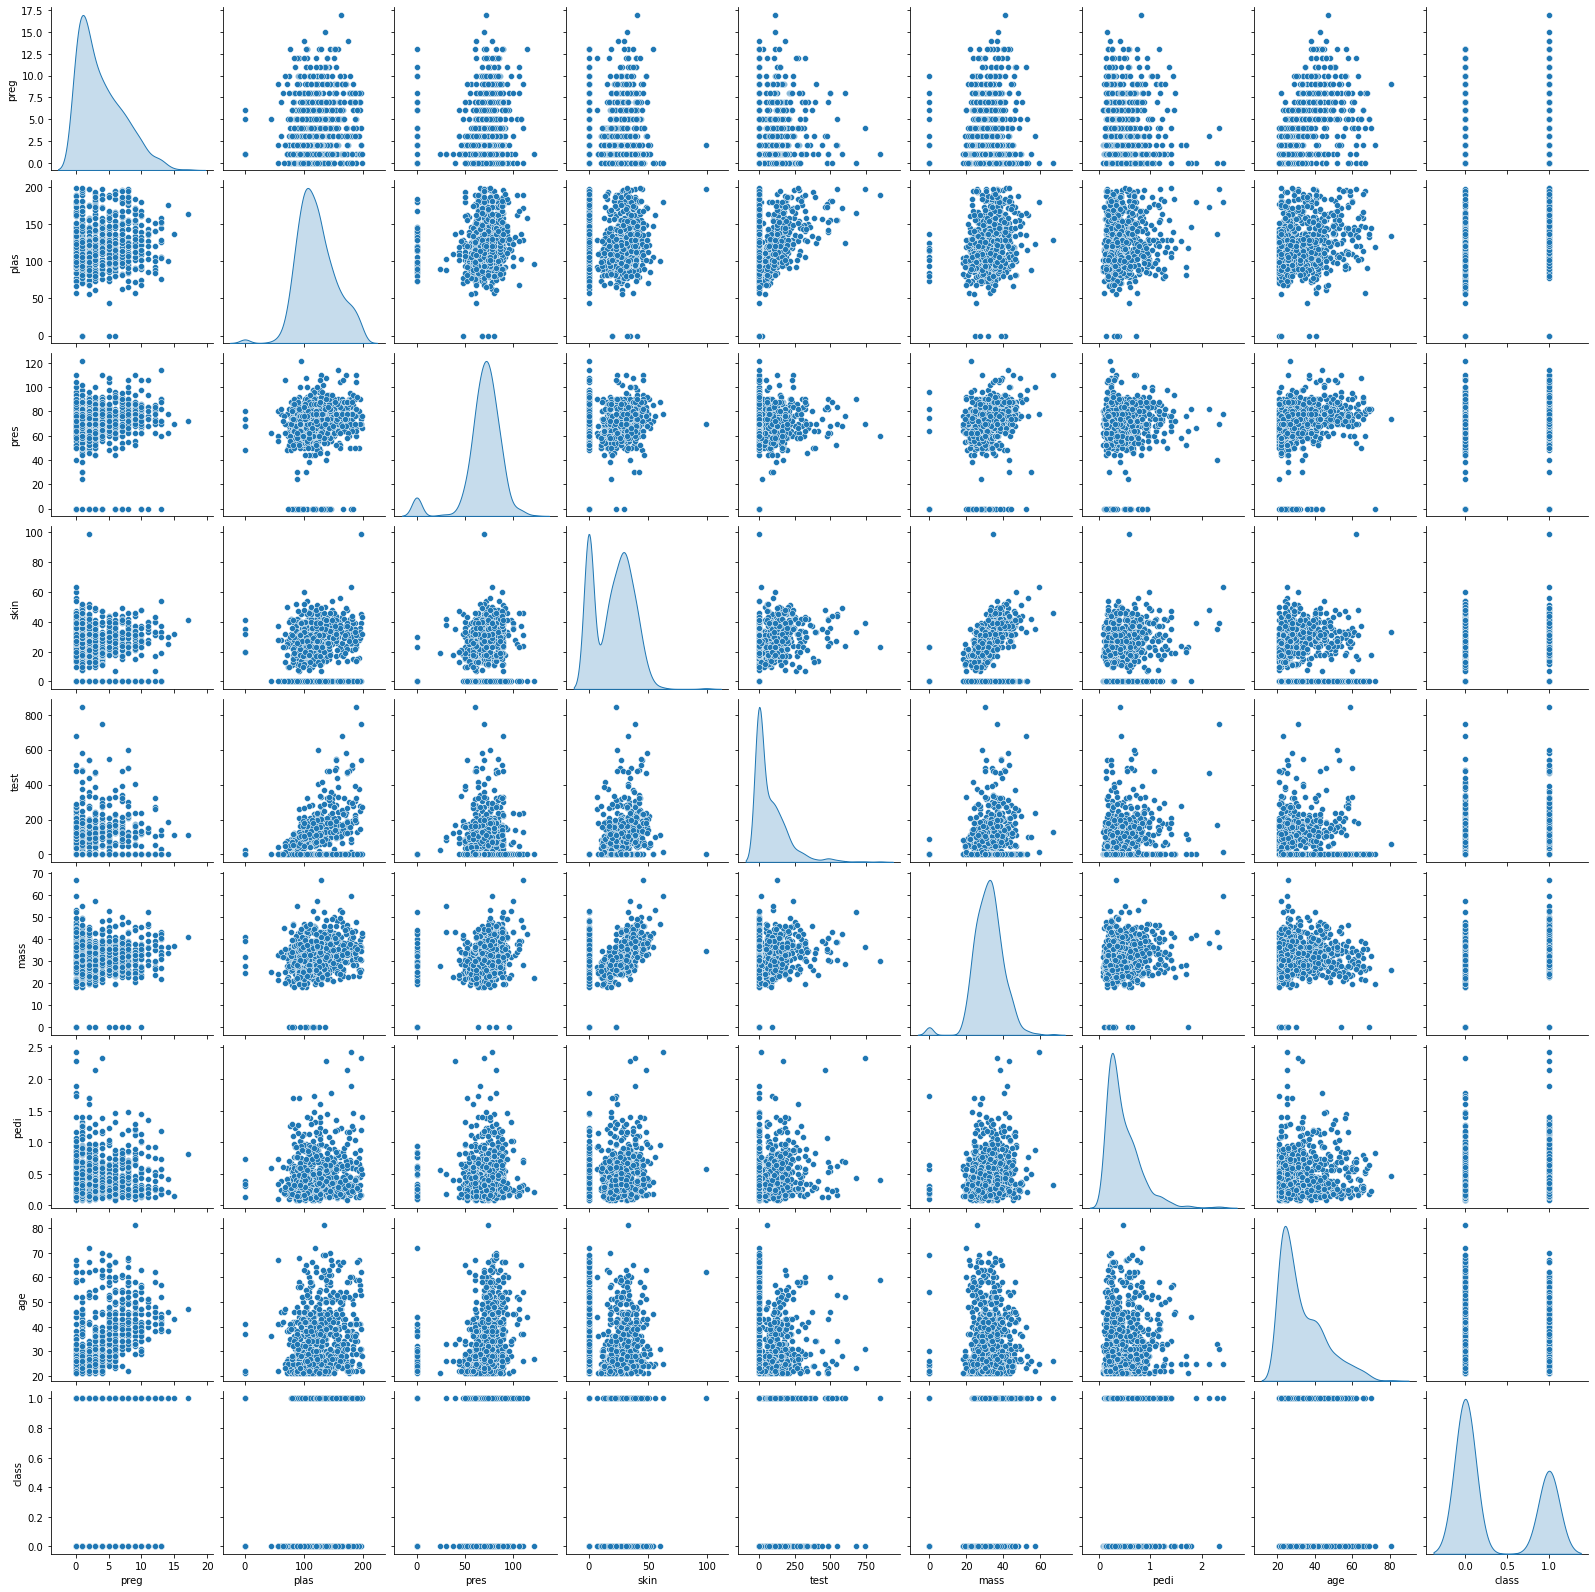

In [13]:
# Check distribution and effect of feature varialbles

sns.pairplot(diabetes,diag_kind='kde')

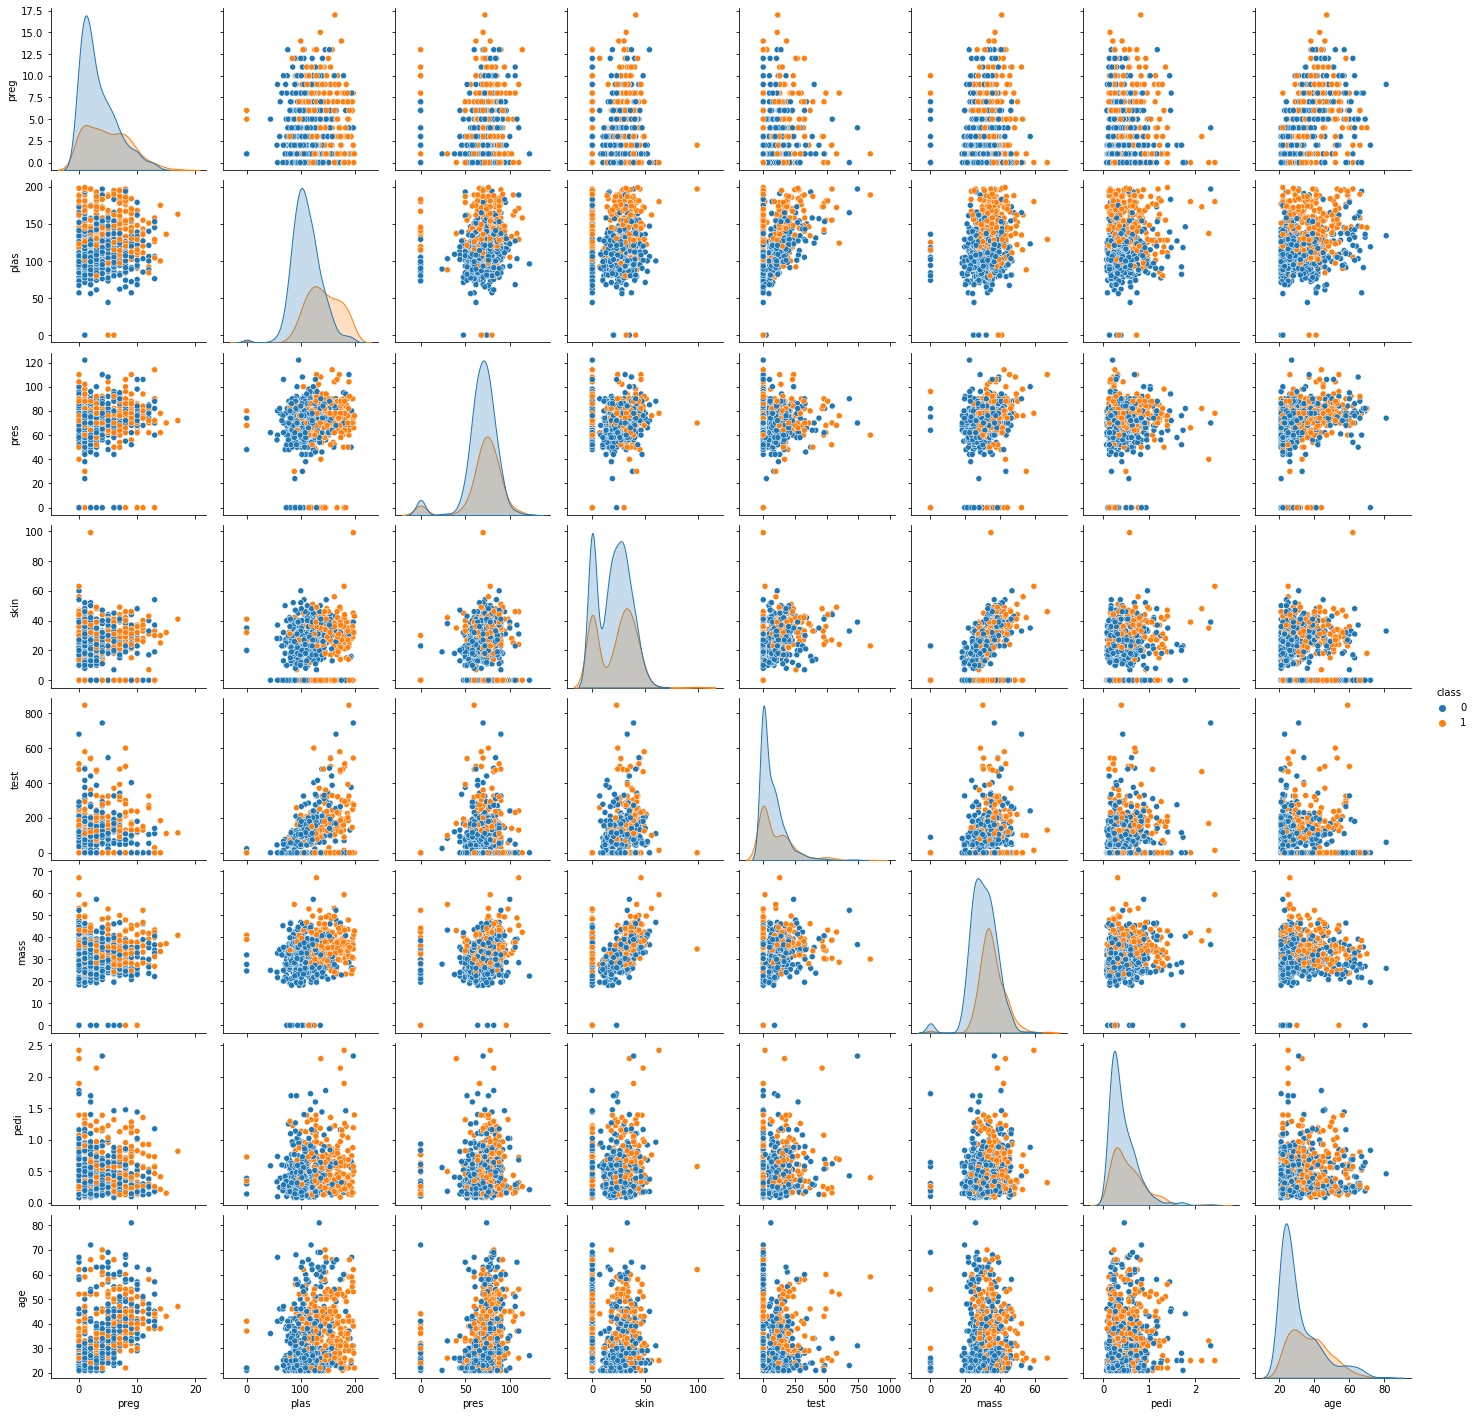

In [14]:
# Check the effect of feature variables with respect to target variable

sns.pairplot(diabetes,diag_kind='kde',hue='class')

We can say that among all the feature variables, 'Plasma' is the most prominent feature causing diabetes.

# **Implementing Logistic Regression**

In [15]:
# Define input and output variables:

X=diabetes.drop('class',axis=1)
y=diabetes['class']

**Normalising data**

In [30]:
# Using scaling method for normalising the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled_diabetes= pd.DataFrame(sc.fit_transform(diabetes))
scaled_diabetes.columns = diabetes.columns
scaled_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


**Check for features affecting the target variable:**

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

dt = GradientBoostingClassifier()
dt.fit(X,y)

dt.feature_importances_

array([0.05362193, 0.40895052, 0.03652886, 0.01775061, 0.04732453,
       0.19354256, 0.10492438, 0.13735662])

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)

dt.feature_importances_

array([0.05873431, 0.3107998 , 0.07905656, 0.01647906, 0.03596824,
       0.23510892, 0.13842533, 0.12542778])

**Using Train Test Split model and decision tree determine accuracy and other important results** 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
dt.fit(X_train,y_train)

print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))

predicted = dt.predict(X_test)

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.7361563517915309
Testing Accuracy
0.7337662337662337
[[77 22]
 [19 36]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154

0.6206896551724138
0.6545454545454545
0.6371681415929203


In [22]:
dt.feature_importances_

array([0.        , 0.79271457, 0.        , 0.        , 0.        ,
       0.20728543, 0.        , 0.        ])

We can observe that the important features are decreased and narrowed down to just two.

In [23]:
X_test.head(3)

,preg,plas,pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27


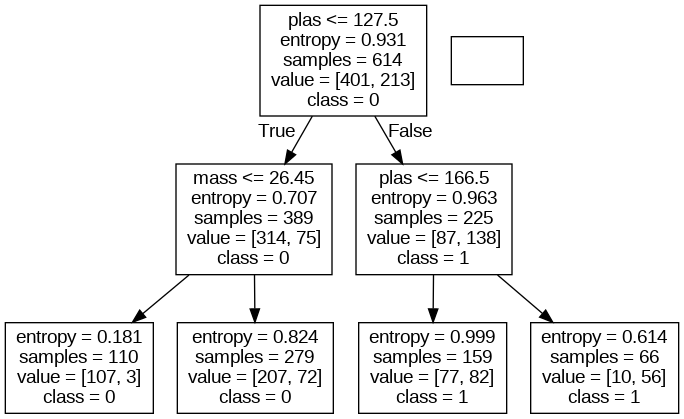

In [25]:
#Print the Decision Tree in Jupyter Notebook

import pydotplus
from sklearn import tree
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, feature_names = X_train.columns, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [32]:
# check results by changing depth and sacling input variables

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)

dt.fit(scaledXtrain,y_train)

print("Training Accuracy")
print(dt.score(scaledXtrain,y_train))
print("Testing Accuracy")
print(dt.score(scaledXtest,y_test))

predicted = dt.predict(scaledXtest)

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.7719869706840391
Testing Accuracy
0.7987012987012987
[[88 11]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

0.7608695652173914
0.6363636363636364
0.693069306930693


**Determine optimum depth for best results**

Automatically created module for IPython interactive environment


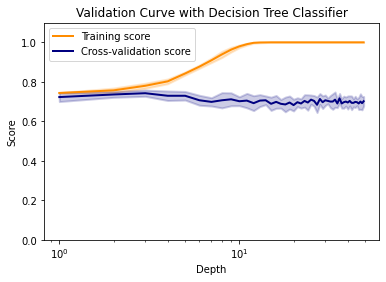

In [34]:
print(__doc__)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X_train, y_train, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [38]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
a = np.arange(1,10)
model = DecisionTreeClassifier()
grid = GridSearchCV(cv=10,estimator=model, scoring='accuracy',param_grid=dict(max_depth=a))
grid.fit(X_train, y_train)
#print(grid)
# summarize the results of the grid search
print(grid.best_estimator_.max_depth)
print(grid.best_params_)
print(grid.best_score_)

4
{'max_depth': 4}
0.7410100475938656


# **Conclusion**



*   Plasma is an important factor causing diabetes followed by mass
*   The greater the age more are chances of having diabetes
*   After pregnancy as well chances of diabetes are increased



